# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading CSV File
netflix_df = pd.read_csv("netflix_titles.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.shape

(8807, 12)

There are 8807 rows and 12 columns in DataFrame

**Statistical Overview of Data in a Netflix DataFrame**

In [5]:
netflix_df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Percentage of missing values
missing_val = netflix_df.isnull().sum()/len(netflix_df)*100
missing_val

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [8]:
#Columns directors, cast, Listed_in, country are unnested consisting more than 1 values
#Hence unnesting those columns

dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = netflix_df['title']) 
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)


cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = netflix_df['title']) 
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.head(10)

listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = netflix_df['title']) 
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)

country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = netflix_df['title']) 
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)

In [9]:
#Collaborating all the unnested columns together before merging with Original DataFrame
df5 = df2.merge(df1,on=['title'],how='inner')

df6 = df5.merge(df3,on=['title'],how='inner')

df7 = df6.merge(df4,on=['title'],how='inner')

df7.head()

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


In [10]:
print("Shape of new dataframe after collaborating : ", df7.shape)

Shape of new dataframe after collaborating :  (201991, 5)


Merging New Dataframe df7 with Original DataFrame netflix_df

In [11]:
netflix_df = df7.merge(netflix_df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
netflix_df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [12]:
netflix_df.shape

(201991, 11)

# Missing Values Treatment

In [13]:
netflix_df.isnull().sum()

title             0
Actors            0
Directors         0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [14]:
#Replacing missing values in Cast column
netflix_df['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)

In [15]:
#Replacing missing values in Director column
netflix_df['Directors'].replace(['nan'],['Unknown Director'],inplace=True)

In [16]:
#Replacing missing values in country column
netflix_df['Country'].replace(['nan'],['Unknown Country'],inplace=True)

In [17]:
netflix_df.isnull().sum()

title             0
Actors            0
Directors         0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [18]:
netflix_df.dropna(inplace = True)

In [19]:
netflix_df.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [20]:
#Converting the Date_added column into datetime format
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

In [21]:
netflix_df['duration'] = netflix_df['duration'].str.replace(" min","")
netflix_df.head(6)

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [22]:
netflix_df.drop(columns = ['show_id'], inplace = True)

In [23]:
netflix_df['duration2'] = netflix_df.duration.copy()
netflix_df1 = netflix_df.copy()

In [24]:
netflix_df1.loc[netflix_df1['duration2'].str.contains('Season'),'duration2'] = 0
netflix_df1['duration2'] = netflix_df1.duration2.astype('int')
netflix_df1.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,Movie,2021-09-25,2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0


In [25]:
netflix_df1.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
date_added      0
release_year    0
rating          0
duration        0
duration2       0
dtype: int64

# Exploratory Data Analysis

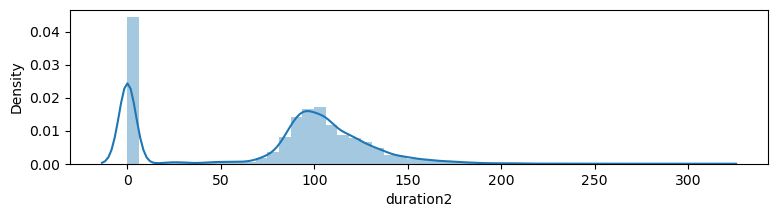

In [26]:
#Histogram to see the distribution of duration
plt.figure(figsize=(9,2))
sns.distplot(netflix_df1['duration2'])

plt.show()

**Values are around 100 which represents movies and 0 represents TV shows**

In [29]:
netflix_df1.drop(['duration2'], axis = 1, inplace = True)

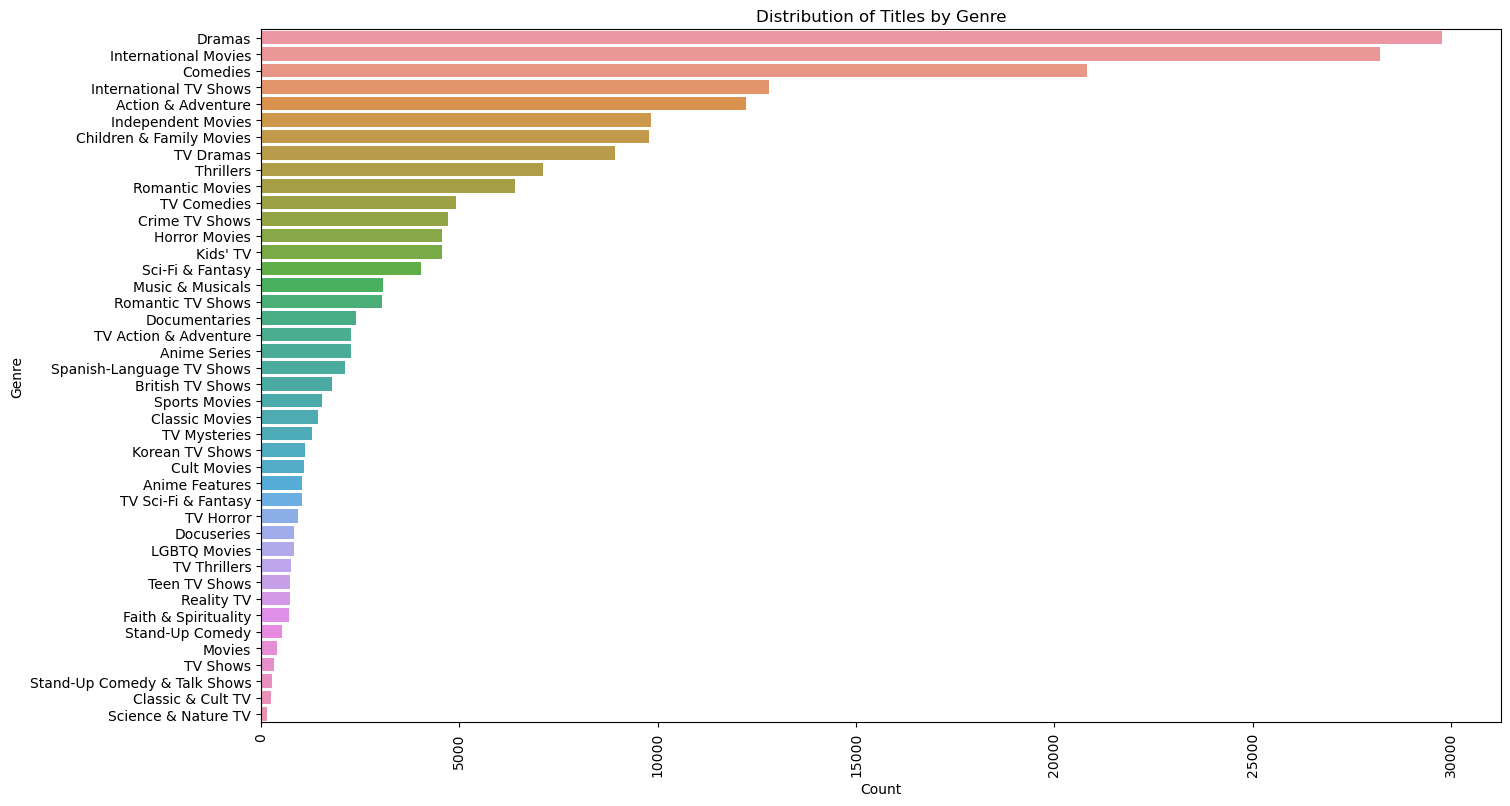

In [30]:
plt.figure(figsize=(16,9))
genre_counts = netflix_df1['Genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, data=netflix_df1)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Titles by Genre')
plt.xticks(rotation=90)
plt.show()

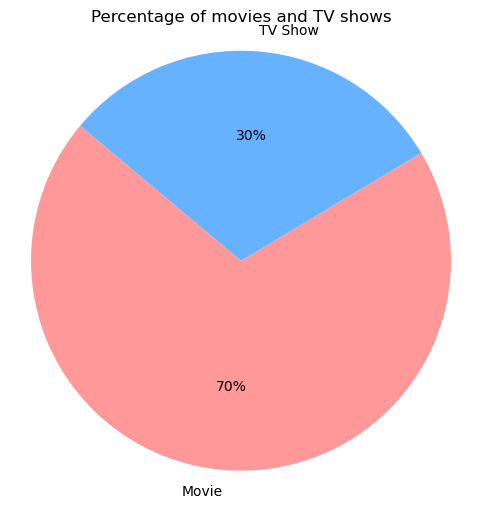

In [31]:
type_count = netflix_df1.groupby(['type']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(10, 6))

light_colors = ['#FF9999', '#66B2FF']

# Create the pie chart
plt.pie(type_count['title'], labels=type_count['type'], colors=light_colors, autopct='%.0f%%', startangle=140)
plt.title('Percentage of movies and TV shows')
plt.axis('square') 
plt.show()

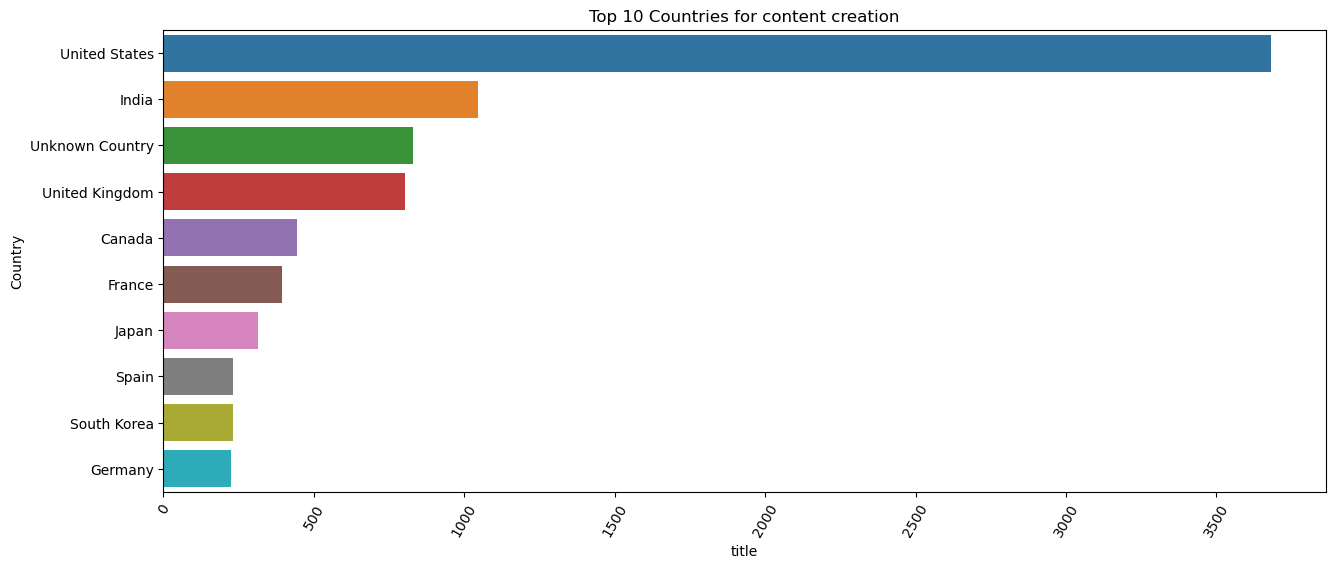

In [32]:
#Creating a Bar chart to calculate the highest content creation countries for Netflix
netflix_df1_country = netflix_df1.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],
                                                                                                          ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(y = "Country",x = 'title', data = netflix_df1_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.show()

**From this Graph we can conclude that US, India are leading countries in Content Creation on Netflix**

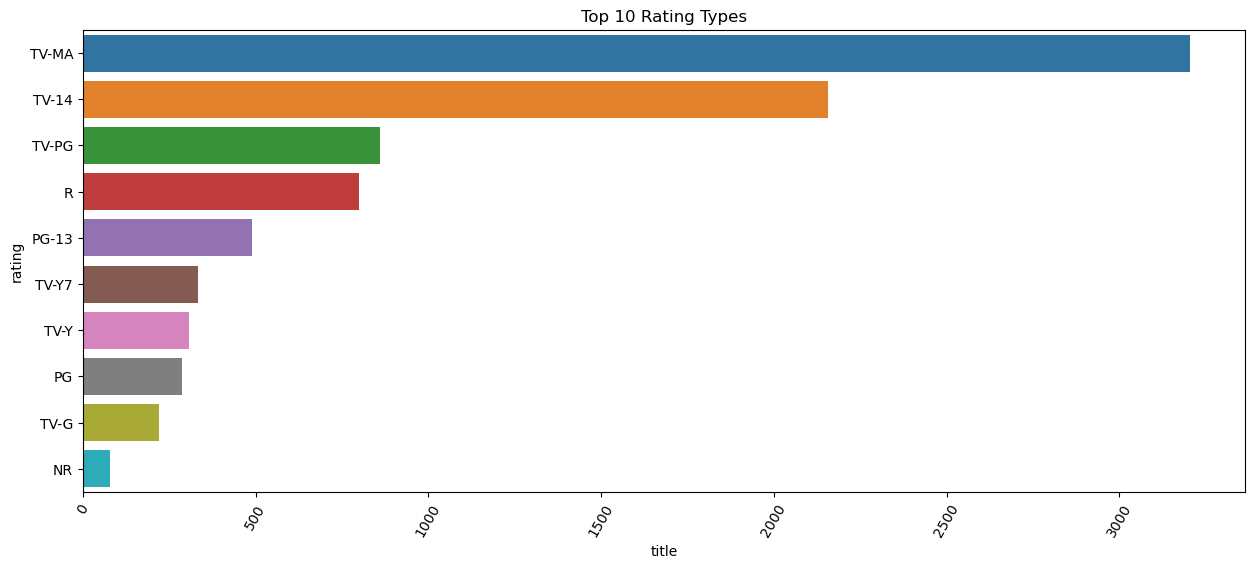

In [33]:
#Creating a Bar chart to calculate the Rating Distribution Count in Netflix
netflix_df1_rating = netflix_df1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],
                                                                                                        ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(y = "rating",x = 'title', data = netflix_df1_rating)
plt.xticks(rotation = 60)
plt.title('Top 10 Rating Types')
plt.show()

In [34]:
top_three_rating = {"TV-MA" : "Mature Audiences Only",
                   "TV-14" : "Parents Strongly Cautioned",
                   "TV-PG" : "Parental Guidance Suggested"}
top_three_rating

{'TV-MA': 'Mature Audiences Only',
 'TV-14': 'Parents Strongly Cautioned',
 'TV-PG': 'Parental Guidance Suggested'}

**The majority of top-rated content on Netflix is designed for a mature audience.**

<function matplotlib.pyplot.show(close=None, block=None)>

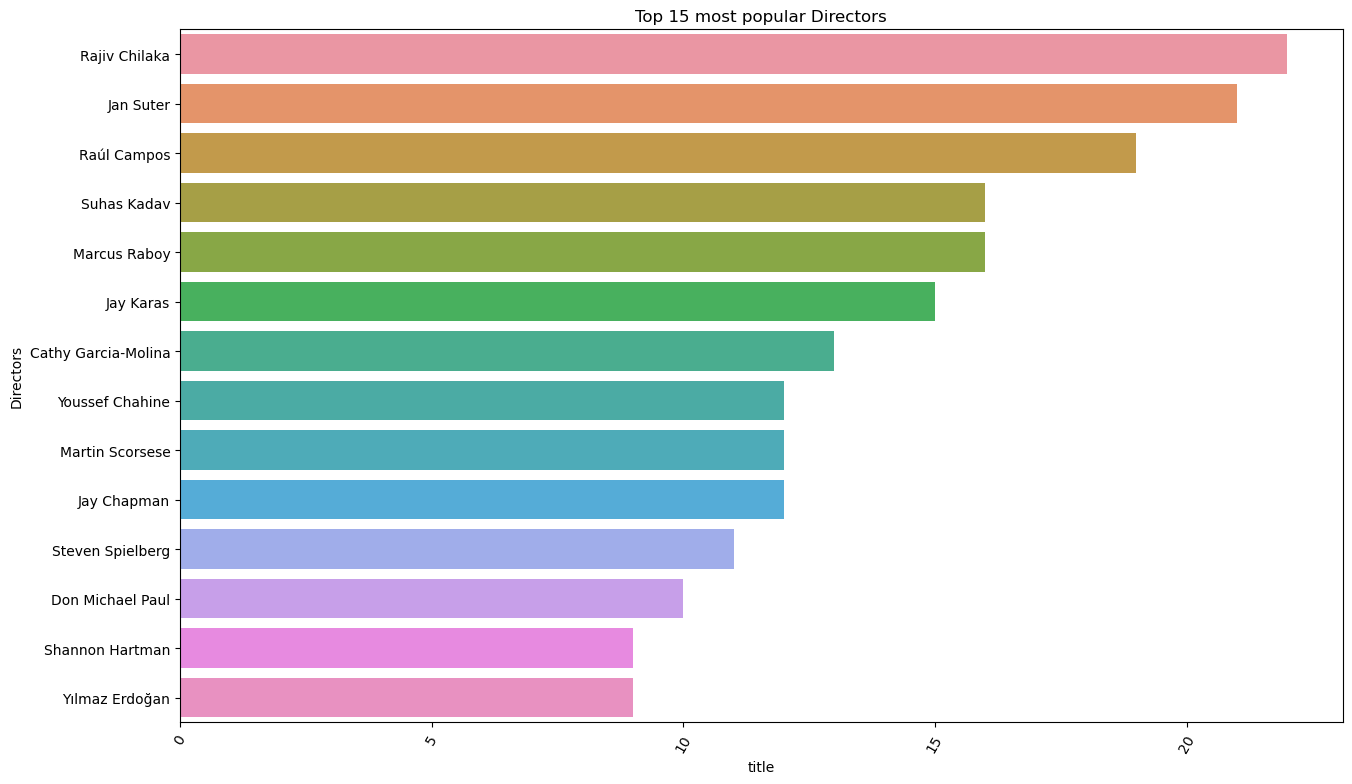

In [35]:
#Creating Bar Chart to view top 3 directors who contribute to Netflix
netflix_df1_directors = netflix_df1.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],
                                                                                                        ascending=False)[:15]
netflix_df1_directors = netflix_df1_directors[netflix_df1_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,9))
sns.barplot(y = "Directors",x = 'title', data = netflix_df1_directors )
plt.xticks(rotation = 60)
plt.title('Top 15 most popular Directors')
plt.show

**Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix**

<function matplotlib.pyplot.show(close=None, block=None)>

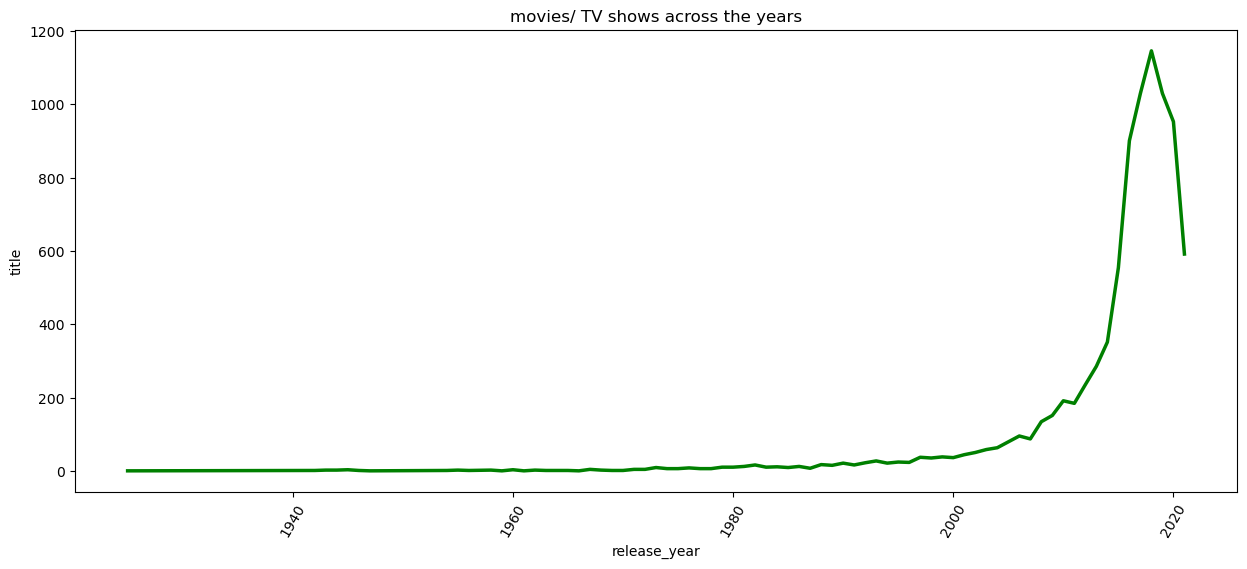

In [36]:
#Visualizing the netflix content over the years
netflix_df1_year = netflix_df1.groupby(['release_year']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "release_year",y = 'title', data = netflix_df1_year, color = 'g', linewidth = 2.5)
plt.xticks(rotation = 60)
plt.title('movies/ TV shows across the years')
plt.show

**The volume of content on Netflix exhibited a consistent rise from 2008 up until 2019, followed by a decline, possibly attributed to the impact of the Covid pandemic**


Text(0.5, 1.0, 'Movies and TV Shows added to Netflix by date ')

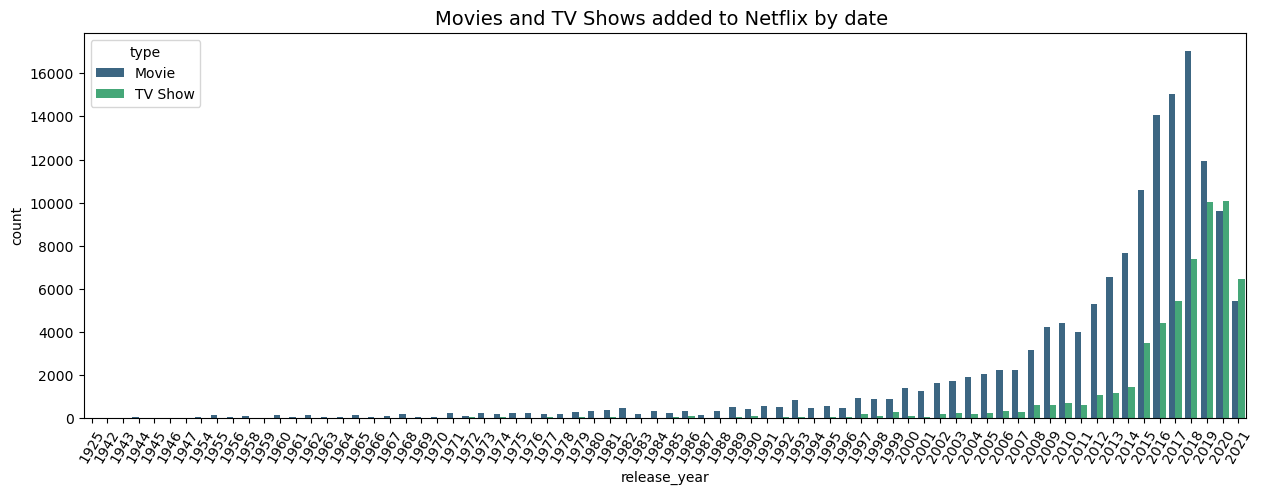

In [37]:
fig = plt.figure(figsize = (15,5))

sns.countplot(data = netflix_df1,x = 'release_year',hue = 'type',palette ="viridis")
plt.xticks(rotation=60)
plt.title('Movies and TV Shows added to Netflix by date ', fontsize=14)

**Throughout the years, there has been a consistent upward trend in the addition of both TV shows and movies to the platform. However, following 2020, there was a noticeable decline, possibly attributable to Covid-related factors. Furthermore, it is evident that the accumulation of movies has surpassed that of TV shows over time**

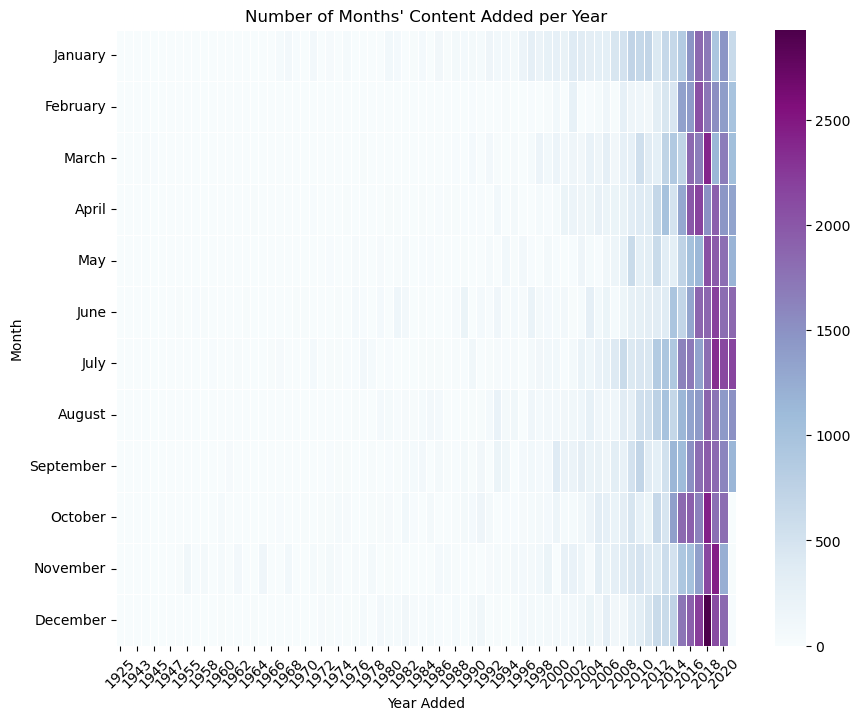

In [38]:
netflix_df1['month_name'] = netflix_df1['date_added'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']
content = netflix_df1.groupby('release_year')['month_name'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 8))
plt.title("Number of Months' Content Added per Year")
sns.heatmap(content, cmap='BuPu', fmt='g', linewidths=.5)
plt.xlabel('Year Added')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()

**The peak periods for content additions were November 2019 and July 2021, during which the highest numbers of movies and TV shows were introduced**

In [39]:
netflix_df1.drop(['duration', 'date_added'], axis = 1, inplace = True)

In [40]:
netflix_df1.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,month_name
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,Movie,2020,PG-13,September
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,TV Show,2021,TV-MA,September
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,TV Show,2021,TV-MA,September
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,TV Show,2021,TV-MA,September
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,TV Show,2021,TV-MA,September


# Label Encoding

Importing Dependencies

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [42]:
columns_to_use = ['title', 'Actors', 'Directors', 'Genre', 'Country', 'type', 'month_name']

In [43]:
for column in columns_to_use:
    netflix_df1[column] = label_encoder.fit_transform(netflix_df1[column])

In [44]:
netflix_df1.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,month_name
0,1972,34170,2531,10,119,0,2020,PG-13,11
1,1088,1599,4742,17,102,1,2021,TV-MA,11
2,1088,1599,4742,34,102,1,2021,TV-MA,11
3,1088,1599,4742,36,102,1,2021,TV-MA,11
4,1088,18087,4742,17,102,1,2021,TV-MA,11


**Dataframe contain more than 2lacs records, hence taking 10,000 records each for machine learning**

In [45]:
min_records = netflix_df1.loc[:10000,]

In [46]:
X = min_records.drop(["rating"], axis=1)
y = min_records["rating"]

# Model Selection

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9975012493753124
              precision    recall  f1-score   support

           G       1.00      1.00      1.00         2
          PG       1.00      1.00      1.00       179
       PG-13       1.00      1.00      1.00       233
           R       1.00      1.00      1.00       347
       TV-14       1.00      0.99      1.00       379
        TV-G       1.00      1.00      1.00         6
       TV-MA       1.00      1.00      1.00       642
       TV-PG       0.99      1.00      1.00       148
        TV-Y       0.96      1.00      0.98        23
       TV-Y7       1.00      1.00      1.00        42

    accuracy                           1.00      2001
   macro avg       0.99      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



**Taking random 20,000 records for prediction**

In [49]:
min_records2 = netflix_df1.loc[40000:60000,]
X = min_records2.drop(["rating"], axis=1)
y = min_records2["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9960009997500625
              precision    recall  f1-score   support

          PG       1.00      1.00      1.00       228
       PG-13       0.99      1.00      1.00       190
           R       1.00      1.00      1.00       297
       TV-14       1.00      0.99      0.99       889
        TV-G       1.00      0.99      1.00       126
       TV-MA       0.99      1.00      1.00      1754
       TV-PG       1.00      0.98      0.99       285
        TV-Y       1.00      0.97      0.99        79
       TV-Y7       0.99      1.00      1.00       153

    accuracy                           1.00      4001
   macro avg       1.00      0.99      1.00      4001
weighted avg       1.00      1.00      1.00      4001



# Balancing the Data

In [50]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [51]:
print("Class distribution before oversampling:", Counter(y))

Class distribution before oversampling: Counter({'TV-MA': 8836, 'TV-14': 4463, 'R': 1465, 'TV-PG': 1349, 'PG': 1073, 'PG-13': 886, 'TV-Y7': 813, 'TV-G': 648, 'TV-Y': 468})


In [72]:
class_distribution_before = Counter(y)

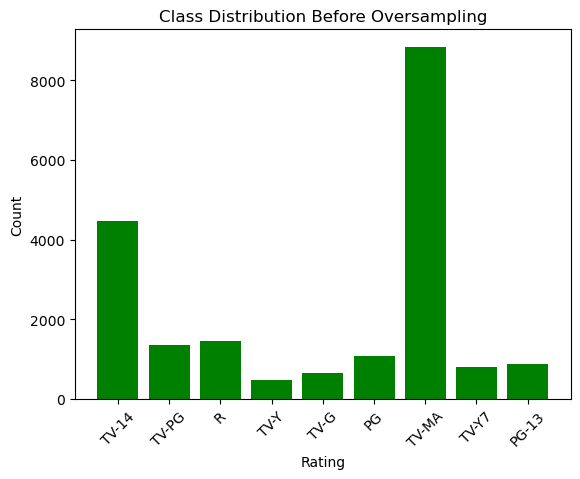

In [73]:
labels = class_distribution_before.keys()
counts = class_distribution_before.values()

# Create a bar graph
plt.bar(labels, counts, color = 'g')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Class Distribution Before Oversampling")

plt.xticks(rotation=45)
plt.show()

In [52]:
oversampler = RandomOverSampler(random_state=42)

In [53]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [54]:
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution after oversampling: Counter({'TV-14': 8836, 'TV-PG': 8836, 'R': 8836, 'TV-Y': 8836, 'TV-G': 8836, 'PG': 8836, 'TV-MA': 8836, 'TV-Y7': 8836, 'PG-13': 8836})


In [55]:
class_distribution = Counter(y_resampled)

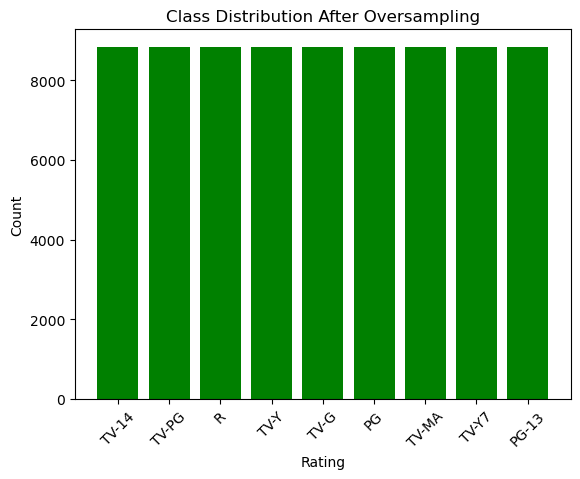

In [56]:
labels = class_distribution.keys()
counts = class_distribution.values()

# Create a bar graph
plt.bar(labels, counts, color = 'g')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Class Distribution After Oversampling")

plt.xticks(rotation=45)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest Classifier

In [58]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics for Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Random Forest Classifier Metrics:
Accuracy: 0.9997485067588808
Classification Report:
               precision    recall  f1-score   support

          PG       1.00      1.00      1.00      1779
       PG-13       1.00      1.00      1.00      1816
           R       1.00      1.00      1.00      1739
       TV-14       1.00      1.00      1.00      1704
        TV-G       1.00      1.00      1.00      1833
       TV-MA       1.00      1.00      1.00      1747
       TV-PG       1.00      1.00      1.00      1771
        TV-Y       1.00      1.00      1.00      1756
       TV-Y7       1.00      1.00      1.00      1760

    accuracy                           1.00     15905
   macro avg       1.00      1.00      1.00     15905
weighted avg       1.00      1.00      1.00     15905

Confusion Matrix:
 [[1779    0    0    0    0    0    0    0    0]
 [   0 1816    0    0    0    0    0    0    0]
 [   0    0 1739    0    0    0    0    0    0]
 [   0    0    0 1702    0    2    0    0   

In [59]:
np.transpose(y_pred_rf)
rf_df=pd.DataFrame(y_pred_rf)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_rf = result.sort_index()
y_both = pd.concat([rf_df, result_rf], axis=1)
y_both.columns = ['Predicted Rating', 'Original Rating']
print(y_both)

      Predicted Rating Original Rating
0                   PG              PG
1                TV-PG           TV-PG
2                PG-13           PG-13
3                PG-13           PG-13
4                PG-13           PG-13
...                ...             ...
15900            TV-Y7           TV-Y7
15901            TV-MA           TV-MA
15902            TV-14           TV-14
15903            TV-MA           TV-MA
15904                R               R

[15905 rows x 2 columns]


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Logistic Regression Metrics:
Accuracy: 0.1840930524992141
Confusion Matrix:
 [[ 699   66  486   59    6   92  180   43  148]
 [ 203   75  298   15   19  219  462   68  457]
 [ 673   35  448   33   18  120  276   51   85]
 [ 227   35  264   53   10   33  314  173  595]
 [ 339   67  223   91    9   48  310  131  615]
 [ 263   26  223   32   13   24  172   80  914]
 [ 222   92  162  114   65   28  409  191  488]
 [ 177   11  109    0    0   50  337   67 1005]
 [ 166    1   62    0    8  136   89  154 1144]]
Classification Report:
               precision    recall  f1-score   support

          PG       0.24      0.39      0.29      1779
       PG-13       0.18      0.04      0.07      1816
           R       0.20      0.26      0.22      1739
       TV-14       0.13      0.03      0.05      1704
        TV-G       0.06      0.00      0.01      1833
       TV-MA       0.03      0.01      0.02      1747
       TV-PG       0.16      0.23      0.19      1771
        TV-Y       0.07      0.0

In [61]:
np.transpose(y_pred_logreg)
logreg_df=pd.DataFrame(y_pred_logreg)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_logreg = result.sort_index()
y_both = pd.concat([logreg_df, result_logreg], axis=1)
y_both.columns = ['Predicted Rating', 'Original Rating']
print(y_both)

      Predicted Rating Original Rating
0                TV-Y7              PG
1                TV-PG           TV-PG
2                TV-Y7           PG-13
3                TV-Y7           PG-13
4                    R           PG-13
...                ...             ...
15900             TV-Y           TV-Y7
15901            TV-Y7           TV-MA
15902             TV-Y           TV-14
15903            TV-Y7           TV-MA
15904               PG               R

[15905 rows x 2 columns]


# DecisionTree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Decision Tree Classifier Metrics:
Accuracy: 0.9986796604841245
Confusion Matrix:
 [[1779    0    0    0    0    0    0    0    0]
 [   0 1816    0    0    0    0    0    0    0]
 [   0    0 1739    0    0    0    0    0    0]
 [   2    0    0 1693    0    7    1    1    0]
 [   0    0    0    0 1833    0    0    0    0]
 [   0    1    0    4    0 1737    2    3    0]
 [   0    0    0    0    0    0 1771    0    0]
 [   0    0    0    0    0    0    0 1756    0]
 [   0    0    0    0    0    0    0    0 1760]]
Classification Report:
               precision    recall  f1-score   support

          PG       1.00      1.00      1.00      1779
       PG-13       1.00      1.00      1.00      1816
           R       1.00      1.00      1.00      1739
       TV-14       1.00      0.99      1.00      1704
        TV-G       1.00      1.00      1.00      1833
       TV-MA       1.00      0.99      1.00      1747
       TV-PG       1.00      1.00      1.00      1771
        TV-Y       1.00    

In [63]:
np.transpose(y_pred_dt)
dt_df=pd.DataFrame(y_pred_dt)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_dt = result.sort_index()
y_both = pd.concat([dt_df, result_dt], axis=1)
y_both.columns = ['Predicted Rating', 'Original Rating']
print(y_both)

      Predicted Rating Original Rating
0                   PG              PG
1                TV-PG           TV-PG
2                PG-13           PG-13
3                PG-13           PG-13
4                PG-13           PG-13
...                ...             ...
15900            TV-Y7           TV-Y7
15901            TV-MA           TV-MA
15902            TV-14           TV-14
15903            TV-MA           TV-MA
15904                R               R

[15905 rows x 2 columns]


# K-Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Classifier Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


K-Nearest Neighbors (KNN) Classifier Metrics:
Accuracy: 0.9534737503929582
Confusion Matrix:
 [[1779    0    0    0    0    0    0    0    0]
 [   0 1816    0    0    0    0    0    0    0]
 [   0    2 1728    0    0    5    3    0    1]
 [  18   10   18 1545    7   57   29   11    9]
 [   0    0    0    0 1833    0    0    0    0]
 [  32   25   65  235   35 1185   80   28   62]
 [   0    0    0    5    0    0 1766    0    0]
 [   0    0    0    0    0    0    0 1756    0]
 [   0    2    0    0    0    0    0    1 1757]]
Classification Report:
               precision    recall  f1-score   support

          PG       0.97      1.00      0.99      1779
       PG-13       0.98      1.00      0.99      1816
           R       0.95      0.99      0.97      1739
       TV-14       0.87      0.91      0.89      1704
        TV-G       0.98      1.00      0.99      1833
       TV-MA       0.95      0.68      0.79      1747
       TV-PG       0.94      1.00      0.97      1771
        TV-Y   

In [65]:
np.transpose(y_pred_knn)
knn_df=pd.DataFrame(y_pred_knn)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_knn = result.sort_index()
y_both = pd.concat([knn_df, result_knn], axis=1)
y_both.columns = ['Predicted Rating', 'Original Rating']
print(y_both)

      Predicted Rating Original Rating
0                   PG              PG
1                TV-PG           TV-PG
2                PG-13           PG-13
3                PG-13           PG-13
4                PG-13           PG-13
...                ...             ...
15900            TV-Y7           TV-Y7
15901            TV-MA           TV-MA
15902            TV-14           TV-14
15903            TV-MA           TV-MA
15904                R               R

[15905 rows x 2 columns]


# AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_adaboost)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
class_report = classification_report(y_test, y_pred_adaboost)

print("\nAdaBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


AdaBoost Classifier Metrics:
Accuracy: 0.28506758880855076
Confusion Matrix:
 [[967 169  70 199  70  76 187  41   0]
 [826 545 138  39  92  34 129  13   0]
 [281 311 629 217  75   0 226   0   0]
 [493  68  89 354   8 239 179 197  77]
 [ 94 171 219  46 212 461 220 379  31]
 [220  21  95 304   8 247 164 551 137]
 [367  41  27 478  96 407 166  96  93]
 [ 92   0   0  41  24 382  77 903 237]
 [  0   0   0   7   0 381   0 861 511]]
Classification Report:
               precision    recall  f1-score   support

          PG       0.29      0.54      0.38      1779
       PG-13       0.41      0.30      0.35      1816
           R       0.50      0.36      0.42      1739
       TV-14       0.21      0.21      0.21      1704
        TV-G       0.36      0.12      0.18      1833
       TV-MA       0.11      0.14      0.12      1747
       TV-PG       0.12      0.09      0.11      1771
        TV-Y       0.30      0.51      0.38      1756
       TV-Y7       0.47      0.29      0.36      1760

   

In [67]:
np.transpose(y_pred_adaboost)
adaboost_df=pd.DataFrame(y_pred_adaboost)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_adaboost = result.sort_index()
y_both = pd.concat([adaboost_df, result_adaboost], axis=1)
y_both.columns = ['Predicted Rating', 'Original Rating']
print(y_both)

      Predicted Rating Original Rating
0                TV-PG              PG
1                TV-MA           TV-PG
2                   PG           PG-13
3                PG-13           PG-13
4                    R           PG-13
...                ...             ...
15900            TV-Y7           TV-Y7
15901             TV-Y           TV-MA
15902            TV-PG           TV-14
15903            TV-Y7           TV-MA
15904             TV-G               R

[15905 rows x 2 columns]


In [69]:
master_prediction = pd.concat([rf_df, logreg_df, dt_df, knn_df, adaboost_df, result_adaboost], axis = 1)
master_prediction.columns = ['Random Forest Prediction', 'Logistic Regression Prediction','Decision Tree Prediction',
                             'KNN Prediction','Adaboost Prediction', 'Original Rating']
master_prediction.head(20)

,Random Forest Prediction,Logistic Regression Prediction,Decision Tree Prediction,KNN Prediction,Adaboost Prediction,Original calories
0,PG,TV-Y7,PG,PG,TV-PG,PG
1,TV-PG,TV-PG,TV-PG,TV-PG,TV-MA,TV-PG
2,PG-13,TV-Y7,PG-13,PG-13,PG,PG-13
3,PG-13,TV-Y7,PG-13,PG-13,PG-13,PG-13
4,PG-13,R,PG-13,PG-13,R,PG-13
5,TV-MA,TV-Y7,TV-MA,TV-MA,TV-Y,TV-MA
6,TV-PG,PG,TV-PG,TV-PG,R,TV-PG
7,TV-14,TV-PG,TV-14,TV-14,TV-14,TV-14
8,R,TV-PG,R,R,R,R
9,TV-Y7,TV-Y7,TV-Y7,TV-Y7,TV-MA,TV-Y7


In [70]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN', 'Adaboost']
predictions = [y_pred_rf, y_pred_logreg, y_pred_dt, y_pred_knn, y_pred_adaboost]

for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 1.00
Logistic Regression Accuracy: 0.18
Decision Tree Accuracy: 1.00
KNN Accuracy: 0.95
Adaboost Accuracy: 0.29


* Based on the provided accuracy values for each model on the test dataset:

- The Random Forest and Decision Tree models exhibit perfect accuracy (1.00).

- The K-Nearest Neighbors (KNN) model achieves a high accuracy of 0.95, indicating robust performance on the test data. This suggests that the KNN model might be a good choice for this classification task.

In [71]:
print("Thank You")

Thank You
